In [1]:
import numpy as np
import gudhi as gd  
import pickle as pickle
from pylab import *
from sklearn.neighbors import KernelDensity
import seaborn as sns
import math

In [2]:
# SimpleExample
# mreža 4x4 krožni 2x2 senzor

class Sensor:
    def __init__(self, sensorPath):
        self.sensorPath = sensorPath # če je senor kvadrat naj bo to zgornji levi kot

    def getSensorArea(self, spaceDim):
        n_frames = len(self.sensorPath)
        space = np.zeros((n_frames, *spaceDim))

        for t in range(n_frames):
            y, x = self.sensorPath[t]
            space[t][y][x] = 1
            space[t][y][x+1] = 1
            space[t][y+1][x] = 1
            space[t][y+1][x+1] = 1
        return space

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# function to get solid cube coordinates
def getCubeCoordinates(space):
    z, y, x = np.shape(space)
    points = []
    for i in range(z):
        for j in range(y):
            for k in range(x):
                if space[i][j][k] == 0:
                    points.append([k, j, i])
    return np.array(points)

# Function to draw a cube
def draw_cube(ax, coords, size):
    """
    Draw a cube in 3D space.

    Parameters:
    - ax: Matplotlib 3D axis
    - size: Size of the cube
    """
    # Define cube vertices
    vertices = [
        [coords[0], coords[1], coords[2]],
        [coords[0] + size, coords[1], coords[2]],
        [coords[0] + size, coords[1] + size, coords[2]],
        [coords[0], coords[1] + size, coords[2]],
        [coords[0], coords[1], coords[2] + size],
        [coords[0] + size, coords[1], coords[2] + size],
        [coords[0] + size, coords[1] + size, coords[2] + size],
        [coords[0], coords[1] + size, coords[2] + size],
    ]

    # Define cube faces
    faces = [
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[7], vertices[6], vertices[2], vertices[3]],
        [vertices[0], vertices[4], vertices[7], vertices[3]],
        [vertices[1], vertices[5], vertices[6], vertices[2]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[2], vertices[3]]
    ]

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

def plotCubes(coordsList):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for coord in coordsList:
        draw_cube(ax, coord, size = 1)

    ax.set_xlim([0, np.max(coordsList[:,0])+1])
    ax.set_ylim([0, np.max(coordsList[:,1]+1)])
    ax.set_zlim([0, np.max(coordsList[:,2]+1)])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('T')

In [9]:
sensorPath = [[2,0], [2,1], [2,2], [1,2], [0,2], [0,1], [0,0], [1,0]]
sensor = Sensor(sensorPath)
space = sensor.getSensorArea((4,4))

#razpolovljen prostor
# space = np.zeros((15,15,15))
# space[5:8,:,:] = 1

filts = np.ravel(space)*5+0.5

In [18]:
# Ustvari cubical complex thingi
cc_density_crater = gd.PeriodicCubicalComplex(
    dimensions = np.shape(space), 
    top_dimensional_cells = filts,
    periodic_dimensions = [1,0,1] # periodično v z dimenziji
)

In [19]:
persistence = cc_density_crater.persistence()
for p in persistence:
    print(p)

(2, (0.5, inf))
(2, (0.5, 5.5))
(2, (0.5, 5.5))
(2, (0.5, 5.5))
(2, (0.5, 5.5))
(2, (0.5, 5.5))
(1, (0.5, inf))
(1, (0.5, inf))
(0, (0.5, inf))


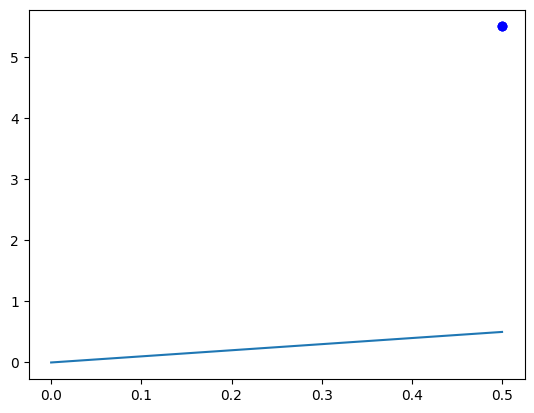

In [12]:
dim = 2
points = []
for p in persistence:
    if p[0] == dim:
        if p[1][1] == float("inf"):
            print("inf")
        points.append(p[1])

points = np.array(points)
x = np.linspace(0, np.max(points[:,0]))
plt.plot(points[:,0], points[:, 1], "bo")
plt.plot(x,x)
plt.show()

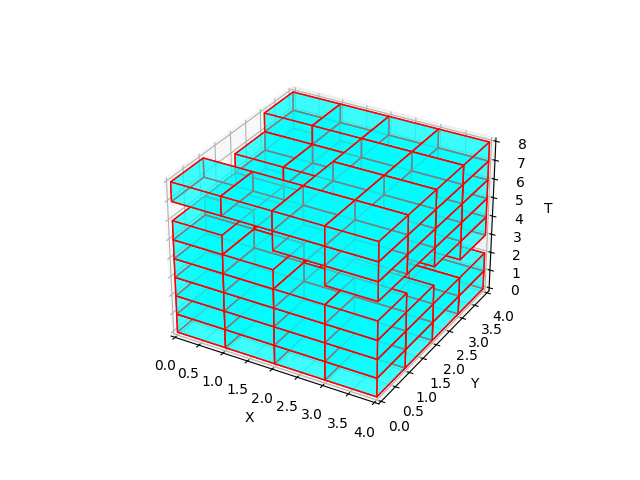

In [13]:
%matplotlib widget

coordsList = getCubeCoordinates(space)
plotCubes(coordsList)
plt.show()
